In [1]:
import sys
sys.path.append('../src')

import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## 1. Load and Augmenting Dataset

In [2]:
DATASET_PATH = "../dataset"
OUTPUT_PATH = "../data/processed"
CACHE_FILE = "../data/processed/preprocessed_uniform.npz"  # Uniform 30% augmentation

from pathlib import Path
from data_preprocessing import (
    load_dataset, 
    augment_dataset, 
    save_preprocessed_data,
    load_preprocessed_data
)

try:
    # Check if cached preprocessed data exists
    cache_path = Path(CACHE_FILE)
    
    if cache_path.exists():
        print("📦 Found cached preprocessed data - loading from cache...")
        augmented_images, augmented_labels = load_preprocessed_data(CACHE_FILE)
        
        print("\n✓ Using cached data - MUCH FASTER than loading from folders!")
        
    else:
        print("🔄 No cache found - loading from folders and preprocessing...")
        print("💡 UNIFORM AUGMENTATION: 30% increase per class")
        
        # Load original dataset
        images, labels, class_names = load_dataset(DATASET_PATH)
        
        # Augment dataset with UNIFORM distribution
        # 30% increase per class (uniform)
        augmented_images, augmented_labels = augment_dataset(
            images, labels, 
            augmentation_factor=0.3,  # 30% per class
            balance_classes=False     # Uniform distribution
        )
        
        # Save to cache for next time
        print("\n💾 Saving preprocessed data to cache for future runs...")
        save_preprocessed_data(augmented_images, augmented_labels, OUTPUT_PATH, 'preprocessed_uniform.npz')
        print("✓ Preprocessed data saved to cache!")
    
    # Display results
    print("\n" + "="*60)
    print("FINAL RESULTS (UNIFORM 30%):")
    print("="*60)
    print(f"Dataset shape: {augmented_images.shape}")
    print(f"Labels shape: {augmented_labels.shape}")
    print(f"Total images: {len(augmented_images)}")
    
    print("\n📊 Uniform class distribution:")
    unique, counts = np.unique(augmented_labels, return_counts=True)
    class_names_dict = {0: 'glass', 1: 'paper', 2: 'cardboard', 3: 'plastic', 4: 'metal', 5: 'trash'}
    total = len(augmented_images)
    for class_id, count in zip(unique, counts):
        pct = (count / total * 100)
        print(f"  {class_names_dict[class_id]}: {count} images ({pct:.1f}%)")
    
    print("\n✅ Uniform augmentation (30% per class):")
    print("   • Each class increased by 30%")
    print("   • Maintains original distribution")
    print("   • No risk of overfitting to augmented minority samples")
    
    print("\n" + "="*60)
    print("✓ Data ready for feature extraction!")
    print("="*60)
    
except Exception as e:
    print(f"\n❌ Error: {e}")
    import traceback
    traceback.print_exc()

📦 Found cached preprocessed data - loading from cache...

LOADING PREPROCESSED DATA FROM CACHE
Loading from: ..\data\processed\preprocessed_uniform.npz
✓ Loaded in 1.19 seconds
✓ Images shape: (2421, 224, 224, 3)
✓ Labels shape: (2421,)
✓ Unique classes: [0 1 2 3 4 5]

✓ Using cached data - MUCH FASTER than loading from folders!

FINAL RESULTS (UNIFORM 30%):
Dataset shape: (2421, 224, 224, 3)
Labels shape: (2421,)
Total images: 2421

📊 Uniform class distribution:
  glass: 500 images (20.7%)
  paper: 583 images (24.1%)
  cardboard: 321 images (13.3%)
  plastic: 471 images (19.5%)
  metal: 409 images (16.9%)
  trash: 137 images (5.7%)

✅ Uniform augmentation (30% per class):
   • Each class increased by 30%
   • Maintains original distribution
   • No risk of overfitting to augmented minority samples

✓ Data ready for feature extraction!


## 2. Test Feature Extraction Methods

TEST IMAGE & FEATURE EXTRACTION DEMO

📷 Test Image:
  - Shape: (224, 224, 3)
  - Class: paper
  - Data type: uint8


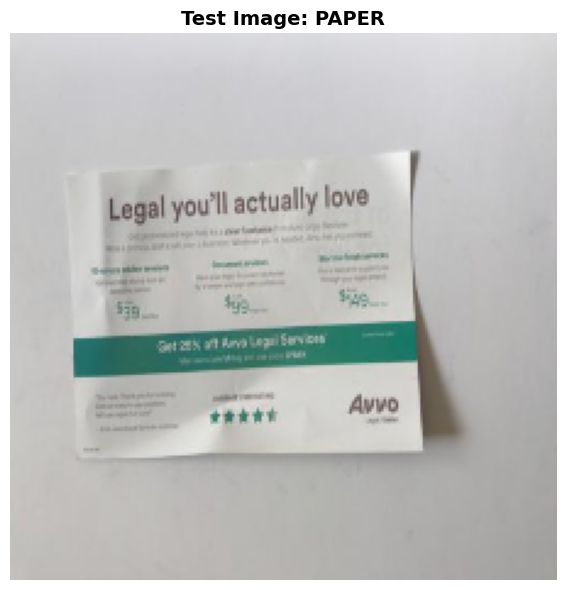


🎨 ENHANCED Features for Glass/Metal/Plastic:
  ✓ Color + Brightness/Reflect: 192 features
      • HSV histogram (96)
      • Color moments (9)
      • Brightness/reflectivity (13) - NEW!
      → Glass: bright, low saturation, specular
      → Metal: shiny, variable brightness
      → Plastic: colored, uniform brightness

  ✓ LBP (4-scale):               80 features
      • Radii: [1, 2, 5, 8] - ENHANCED!
      • Points: [8, 16, 24, 24]
      → Glass: very smooth
      → Plastic: semi-smooth + molding
      → Metal: grain + scratches

  📦 Combined (Normalized):     272 features


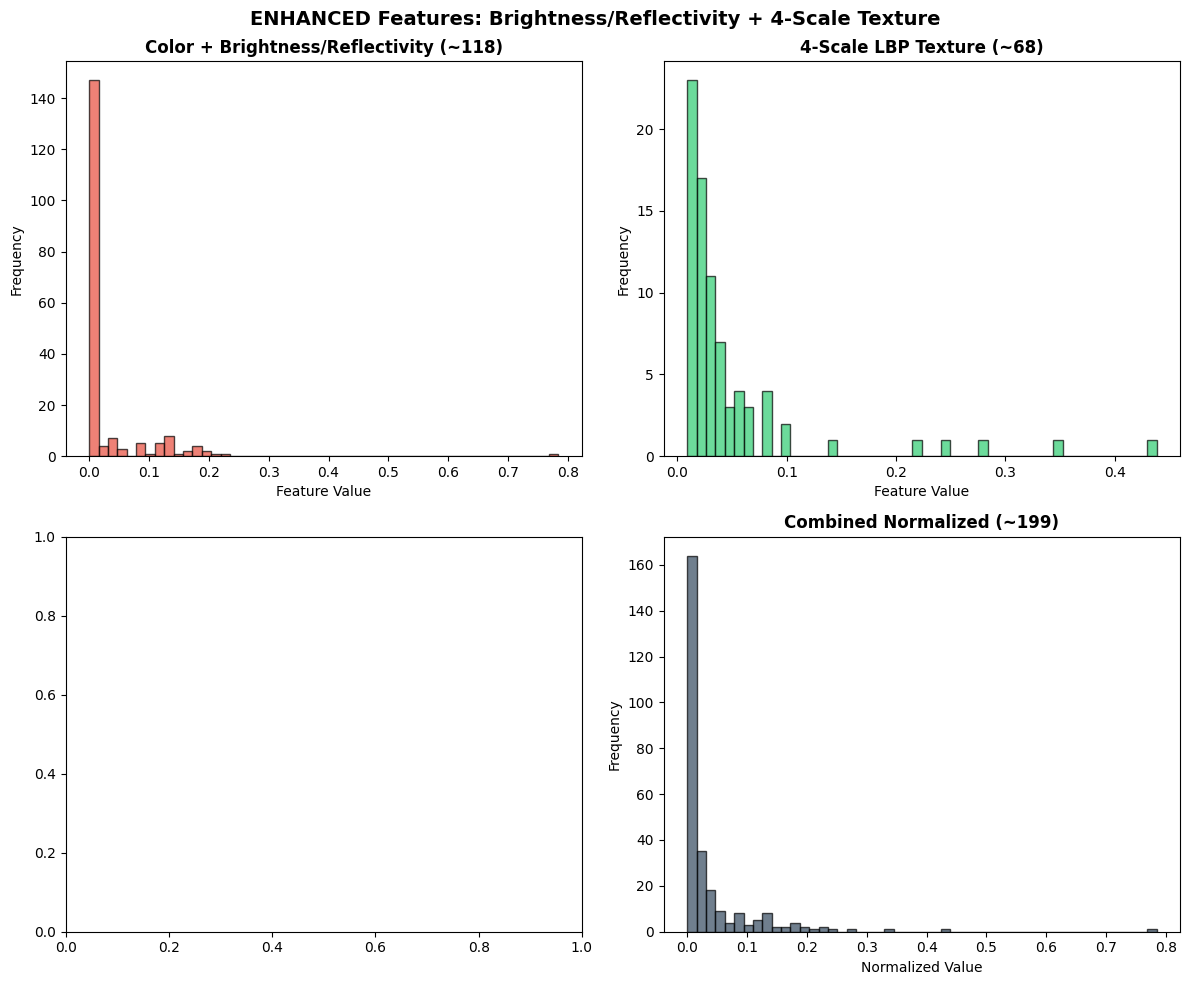

In [3]:
from matplotlib.pylab import rand


print("="*60)
print("TEST IMAGE & FEATURE EXTRACTION DEMO")
print("="*60)

# Define CLASS_NAMES dictionary for reference
CLASS_NAMES = {
    0: 'glass', 
    1: 'paper', 
    2: 'cardboard', 
    3: 'plastic', 
    4: 'metal', 
    5: 'trash'
}

# Get a test image
test_idx = int(rand() * len(augmented_images))
test_image = augmented_images[test_idx]
test_label = augmented_labels[test_idx]

print(f"\n📷 Test Image:")
print(f"  - Shape: {test_image.shape}")
print(f"  - Class: {CLASS_NAMES[test_label]}")
print(f"  - Data type: {test_image.dtype}")

# Display the test image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
ax.imshow(test_image_rgb)
ax.set_title(f'Test Image: {CLASS_NAMES[test_label].upper()}', fontsize=14, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

# Import ENHANCED material-focused feature extraction
from feature_extraction import (
    extract_color_histogram, 
    extract_lbp_features,
    extract_combined_features
)

# Extract each feature type separately
color_feat = extract_color_histogram(test_image, bins=32)
lbp_feat = extract_lbp_features(test_image)
combined_feat = extract_combined_features(test_image)

print(f"\n🎨 ENHANCED Features for Glass/Metal/Plastic:")
print(f"{'='*60}")
print(f"  ✓ Color + Brightness/Reflect: {len(color_feat):>3} features")
print(f"      • HSV histogram (96)")
print(f"      • Color moments (9)")
print(f"      • Brightness/reflectivity (13) - NEW!")
print(f"      → Glass: bright, low saturation, specular")
print(f"      → Metal: shiny, variable brightness")
print(f"      → Plastic: colored, uniform brightness")
print(f"")
print(f"  ✓ LBP (4-scale):              {len(lbp_feat):>3} features")
print(f"      • Radii: [1, 2, 5, 8] - ENHANCED!")
print(f"      • Points: [8, 16, 24, 24]")
print(f"      → Glass: very smooth")
print(f"      → Plastic: semi-smooth + molding")
print(f"      → Metal: grain + scratches")
print(f"")
print(f"{'='*60}")
print(f"  📦 Combined (Normalized):     {len(combined_feat):>3} features")
print(f"{'='*60}")

# Visualize feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('ENHANCED Features: Brightness/Reflectivity + 4-Scale Texture', fontsize=14, fontweight='bold')

# Plot each feature type
axes[0, 0].hist(color_feat, bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Color + Brightness/Reflectivity (~118)', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Feature Value')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(lbp_feat, bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('4-Scale LBP Texture (~68)', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Feature Value')
axes[0, 1].set_ylabel('Frequency')

axes[1, 1].hist(combined_feat, bins=50, color='#34495e', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Combined Normalized (~199)', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Normalized Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [4]:
# Import the function for batch feature extraction
from feature_extraction import extract_features_from_dataset

# Extract features from entire augmented dataset using CNN
print("\n" + "="*60)
print("EXTRACTING FEATURES FROM ENTIRE DATASET - CNN METHOD")
print("="*60)
print(f"Total images to process: {len(augmented_images)}")
print(f"Using: MobileNetV2 (pre-trained on ImageNet)")
print(f"Expected features: 1280 per image")

all_features = extract_features_from_dataset(augmented_images, method='combined')

print(f"\nFeature extraction complete!")
print(f"Final feature matrix shape: {all_features.shape}")
print(f"  - Samples: {all_features.shape[0]}")
print(f"  - Features per sample: {all_features.shape[1]}")
print(f"\n✓ Ready for classifier training with CNN features!")
print(f"✓ Expected accuracy improvement: 5-10% over handcrafted features")


EXTRACTING FEATURES FROM ENTIRE DATASET - CNN METHOD
Total images to process: 2421
Using: MobileNetV2 (pre-trained on ImageNet)
Expected features: 1280 per image

EXTRACTING FEATURES: COMBINED METHOD
Total images: 2421


Extracting features: 100%|██████████| 2421/2421 [02:03<00:00, 19.61it/s]


Feature extraction complete!
Feature matrix shape: (2421, 272)
Features per image: 272


Feature extraction complete!
Final feature matrix shape: (2421, 272)
  - Samples: 2421
  - Features per sample: 272

✓ Ready for classifier training with CNN features!
✓ Expected accuracy improvement: 5-10% over handcrafted features


## 3. Feature Scaling (Critical for SVM and k-NN)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X = all_features
y = augmented_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler (CRITICAL for SVM and k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get actual class names (only classes present in data)
unique_classes = np.unique(y)
actual_class_names = [CLASS_NAMES[i] for i in unique_classes]

print("="*60)
print("DATA PREPARATION COMPLETE")
print("="*60)
print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")
print(f"\nClasses in dataset: {len(unique_classes)}")
print(f"Class names: {actual_class_names}")
print(f"\nFeature scaling applied (StandardScaler)")
print(f"  - Training features: mean=0, std=1")
print(f"  - Test features: scaled using training statistics")
print("="*60)

DATA PREPARATION COMPLETE
Training set: (1936, 272)
Test set: (485, 272)

Classes in dataset: 6
Class names: ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash']

Feature scaling applied (StandardScaler)
  - Training features: mean=0, std=1
  - Test features: scaled using training statistics


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

print("="*60)
print("K-NN CLASSIFIER (with Unknown Rejection)")
print("="*60)

# Train k-NN
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

# Get prediction probabilities for confidence-based rejection
y_proba_knn = knn.predict_proba(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)

# Implement Unknown rejection: if max probability < threshold, classify as "unknown" (ID 6)
confidence_threshold = 0.5  # Adjust this threshold based on performance
max_proba = np.max(y_proba_knn, axis=1)

# Create predictions with unknown class
y_pred_knn_with_unknown = y_pred_knn.copy()
y_pred_knn_with_unknown[max_proba < confidence_threshold] = 6  # ID 6 = unknown

# Calculate accuracies
knn_accuracy = knn.score(X_test_scaled, y_test) * 100
num_rejected = np.sum(max_proba < confidence_threshold)
rejection_rate = (num_rejected / len(y_test)) * 100

print(f"\n✓ Training completed in {train_time:.2f} seconds")
print(f"✓ Overall Accuracy (without rejection): {knn_accuracy:.2f}%")
print(f"✓ Rejection rate: {rejection_rate:.2f}% ({num_rejected}/{len(y_test)} samples)")
print(f"✓ Confidence threshold: {confidence_threshold}")

print("\n" + "="*60)
print("CLASSIFICATION REPORT (without rejection):")
print("="*60)
print(classification_report(y_test, y_pred_knn, target_names=actual_class_names, zero_division=0))

print("\n" + "="*60)
print("CONFUSION MATRIX:")
print("="*60)
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=actual_class_names,
            yticklabels=actual_class_names)
plt.title(f'k-NN Confusion Matrix (Acc: {knn_accuracy:.2f}%)', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Show confidence distribution
plt.figure(figsize=(10, 5))
plt.hist(max_proba, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=confidence_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold: {confidence_threshold}')
plt.xlabel('Maximum Probability (Confidence)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('k-NN Prediction Confidence Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Confidence Analysis:")
print(f"  - Mean confidence: {max_proba.mean():.4f}")
print(f"  - Median confidence: {np.median(max_proba):.4f}")
print(f"  - Min confidence: {max_proba.min():.4f}")
print(f"  - Max confidence: {max_proba.max():.4f}")

## SVM Classifier

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time

print("="*60)
print("SVM HYPERPARAMETER TUNING")
print("="*60)

# Finer parameter grid around typical good values
param_grid = {
    'C': [1, 5, 10, 15, 20],           # Finer steps around common optimal range
    'gamma': ['scale', 'auto', 0.001, 0.005, 0.01],  # Finer gamma values
    'kernel': ['rbf']
}

total_fits = len(param_grid['C']) * len(param_grid['gamma']) * 3  # 3-fold CV
print(f"Parameter grid: {param_grid}")
print(f"Total combinations: {len(param_grid['C'])} × {len(param_grid['gamma'])} = {len(param_grid['C']) * len(param_grid['gamma'])}")
print(f"With 3-fold CV: {total_fits} fits\n")

# GridSearchCV with 3-fold cross-validation
start_time = time.time()
grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)
tuning_time = time.time() - start_time

print(f"\n✓ Tuning completed in {tuning_time:.2f} seconds")
print(f"\n{'='*60}")
print("BEST PARAMETERS:")
print("="*60)
print(f"  C: {grid_search.best_params_['C']}")
print(f"  gamma: {grid_search.best_params_['gamma']}")
print(f"  kernel: {grid_search.best_params_['kernel']}")
print(f"\n  Best CV Score: {grid_search.best_score_*100:.2f}%")

# Show all results
import pandas as pd
results_df = pd.DataFrame(grid_search.cv_results_)[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']]
results_df['mean_test_score'] = (results_df['mean_test_score'] * 100).round(2)
results_df['std_test_score'] = (results_df['std_test_score'] * 100).round(2)
results_df = results_df.sort_values('mean_test_score', ascending=False)
print(f"\n{'='*60}")
print("ALL RESULTS (sorted by accuracy):")
print("="*60)
print(results_df.head(10).to_string(index=False))

SVM HYPERPARAMETER TUNING
Parameter grid: {'C': [1, 5, 10, 15, 20], 'gamma': ['scale', 'auto', 0.001, 0.005, 0.01], 'kernel': ['rbf']}
Total combinations: 5 × 5 = 25
With 3-fold CV: 75 fits

Fitting 3 folds for each of 25 candidates, totalling 75 fits

✓ Tuning completed in 22.92 seconds

BEST PARAMETERS:
  C: 10
  gamma: auto
  kernel: rbf

  Best CV Score: 82.90%

ALL RESULTS (sorted by accuracy):
 param_C param_gamma  mean_test_score  std_test_score
      10        auto            82.90            0.76
      10       scale            82.85            0.75
      20        auto            82.85            1.14
       5       scale            82.85            1.00
      15        auto            82.80            1.21
       5       0.005            82.75            1.16
      20       scale            82.75            1.05
      15       scale            82.75            1.16
       5        auto            82.65            1.00
      10       0.005            82.44            1.05


SVM CLASSIFIER (with Best Parameters)
Using: C=10, gamma=auto, kernel=rbf

✓ Training completed in 1.36 seconds
✓ Overall Accuracy: 81.86%
✓ Rejection rate: 12.78% (62/485 samples)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       glass       0.79      0.74      0.76       100
       paper       0.87      0.84      0.85       117
   cardboard       0.98      0.88      0.93        64
     plastic       0.83      0.85      0.84        94
       metal       0.70      0.90      0.79        82
       trash       0.79      0.54      0.64        28

    accuracy                           0.82       485
   macro avg       0.83      0.79      0.80       485
weighted avg       0.83      0.82      0.82       485


CONFUSION MATRIX:


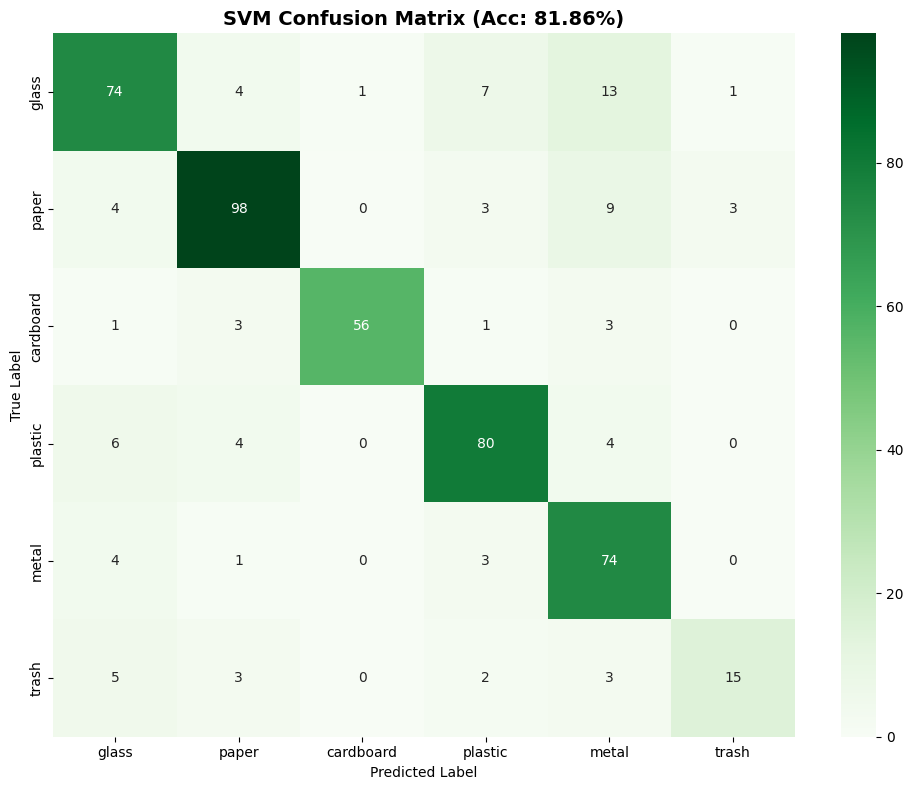

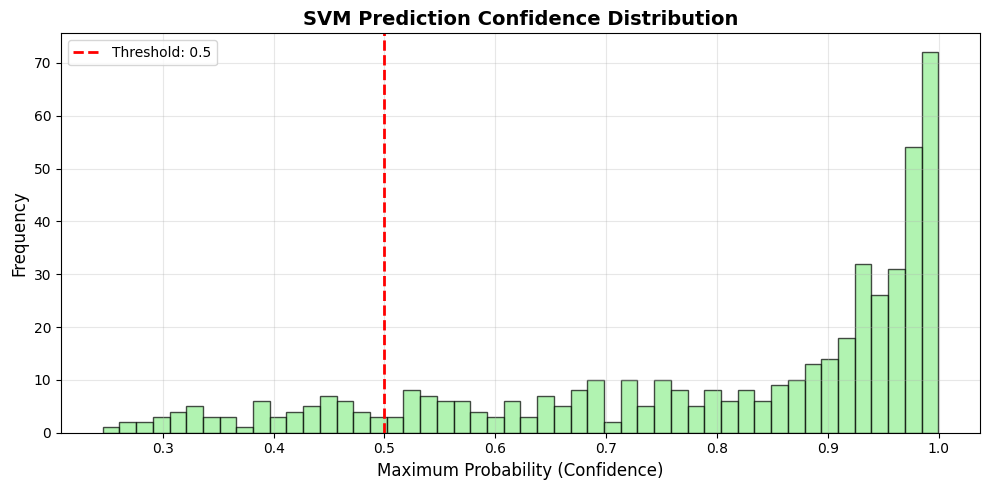


📊 Confidence Analysis:
  - Mean confidence: 0.8013
  - Median confidence: 0.8979
  - Min confidence: 0.2459
  - Max confidence: 0.9994


In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import time

print("="*60)
print("SVM CLASSIFIER (with Best Parameters)")
print("="*60)

# Use best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Using: C={best_params['C']}, gamma={best_params['gamma']}, kernel={best_params['kernel']}")

# Train final SVM with best parameters
start_time = time.time()
svm = SVC(**best_params, probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

# Get prediction probabilities for confidence-based rejection
y_proba_svm = svm.predict_proba(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

# Implement Unknown rejection: if max probability < threshold, classify as "unknown" (ID 6)
confidence_threshold = 0.5
max_proba_svm = np.max(y_proba_svm, axis=1)

# Create predictions with unknown class
y_pred_svm_with_unknown = y_pred_svm.copy()
y_pred_svm_with_unknown[max_proba_svm < confidence_threshold] = 6

# Calculate accuracies
svm_accuracy = svm.score(X_test_scaled, y_test) * 100
num_rejected_svm = np.sum(max_proba_svm < confidence_threshold)
rejection_rate_svm = (num_rejected_svm / len(y_test)) * 100

print(f"\n✓ Training completed in {train_time:.2f} seconds")
print(f"✓ Overall Accuracy: {svm_accuracy:.2f}%")
print(f"✓ Rejection rate: {rejection_rate_svm:.2f}% ({num_rejected_svm}/{len(y_test)} samples)")

print("\n" + "="*60)
print("CLASSIFICATION REPORT:")
print("="*60)
print(classification_report(y_test, y_pred_svm, target_names=actual_class_names, zero_division=0))

print("\n" + "="*60)
print("CONFUSION MATRIX:")
print("="*60)
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=actual_class_names,
            yticklabels=actual_class_names)
plt.title(f'SVM Confusion Matrix (Acc: {svm_accuracy:.2f}%)', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Show confidence distribution
plt.figure(figsize=(10, 5))
plt.hist(max_proba_svm, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(x=confidence_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold: {confidence_threshold}')
plt.xlabel('Maximum Probability (Confidence)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('SVM Prediction Confidence Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Confidence Analysis:")
print(f"  - Mean confidence: {max_proba_svm.mean():.4f}")
print(f"  - Median confidence: {np.median(max_proba_svm):.4f}")
print(f"  - Min confidence: {max_proba_svm.min():.4f}")
print(f"  - Max confidence: {max_proba_svm.max():.4f}")

## Save The Models

## CNN Features

In [ ]:
import joblib
from pathlib import Path
from data_preprocessing import CLASS_NAMES
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(0, '../src')
from feature_extraction import extract_features_from_dataset

MODEL_DIR = Path("../models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

print("="*60)
print("TRAINING AND SAVING ALL MODELS")
print("="*60)

# Save class names (shared by all models)
joblib.dump(CLASS_NAMES, MODEL_DIR / "class_names.pkl")
print("✓ Class names saved\n")

# ============================================================
# 1. CNN FEATURES
# ============================================================
print("-"*60)
print("Processing CNN Features...")
print("-"*60)

# Extract CNN features
cnn_features = extract_features_from_dataset(augmented_images, method='cnn')
print(f"CNN features shape: {cnn_features.shape}")

# Split data
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    cnn_features, augmented_labels, test_size=0.2, random_state=42, stratify=augmented_labels
)

# Scale features
scaler_cnn = StandardScaler()
X_train_cnn_scaled = scaler_cnn.fit_transform(X_train_cnn)
X_test_cnn_scaled = scaler_cnn.transform(X_test_cnn)

# Save CNN scaler
joblib.dump(scaler_cnn, MODEL_DIR / "feature_scaler_cnn.pkl")
print("✓ CNN scaler saved")

# Train and save SVM with CNN
print("\nTraining SVM with CNN features...")
svm_cnn = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm_cnn.fit(X_train_cnn_scaled, y_train_cnn)
svm_cnn_acc = svm_cnn.score(X_test_cnn_scaled, y_test_cnn)
joblib.dump(svm_cnn, MODEL_DIR / "svm_classifier_cnn.pkl")
print(f"✓ SVM+CNN saved (Accuracy: {svm_cnn_acc*100:.2f}%)")

# Train and save KNN with CNN
print("\nTraining KNN with CNN features...")
knn_cnn = KNeighborsClassifier(n_neighbors=5)
knn_cnn.fit(X_train_cnn_scaled, y_train_cnn)
knn_cnn_acc = knn_cnn.score(X_test_cnn_scaled, y_test_cnn)
joblib.dump(knn_cnn, MODEL_DIR / "knn_classifier_cnn.pkl")
print(f"✓ KNN+CNN saved (Accuracy: {knn_cnn_acc*100:.2f}%)")

## HandCrafted Features

In [9]:
import joblib
from pathlib import Path
from data_preprocessing import CLASS_NAMES
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(0, '../src')
from feature_extraction import extract_features_from_dataset
# ============================================================
# 2. HANDCRAFTED FEATURES
# ============================================================
MODEL_DIR = Path("../models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)
print("\n" + "-"*60)
print("Processing Handcrafted Features...")
print("-"*60)

# Extract handcrafted features
handcrafted_features = extract_features_from_dataset(augmented_images, method='combined')
print(f"Handcrafted features shape: {handcrafted_features.shape}")

# Split data
X_train_hc, X_test_hc, y_train_hc, y_test_hc = train_test_split(
    handcrafted_features, augmented_labels, test_size=0.2, random_state=42, stratify=augmented_labels
)

# Scale features
scaler_hc = StandardScaler()
X_train_hc_scaled = scaler_hc.fit_transform(X_train_hc)
X_test_hc_scaled = scaler_hc.transform(X_test_hc)

# Save handcrafted scaler
joblib.dump(scaler_hc, MODEL_DIR / "feature_scaler_handcrafted.pkl")
print("✓ Handcrafted scaler saved")

# Train and save SVM with handcrafted
print("\nTraining SVM with handcrafted features...")
svm_hc = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm_hc.fit(X_train_hc_scaled, y_train_hc)
svm_hc_acc = svm_hc.score(X_test_hc_scaled, y_test_hc)
joblib.dump(svm_hc, MODEL_DIR / "svm_classifier_handcrafted.pkl")
print(f"✓ SVM+Handcrafted saved (Accuracy: {svm_hc_acc*100:.2f}%)")

# Train and save KNN with handcrafted
print("\nTraining KNN with handcrafted features...")
knn_hc = KNeighborsClassifier(n_neighbors=5)
knn_hc.fit(X_train_hc_scaled, y_train_hc)
knn_hc_acc = knn_hc.score(X_test_hc_scaled, y_test_hc)
joblib.dump(knn_hc, MODEL_DIR / "knn_classifier_handcrafted.pkl")
print(f"✓ KNN+Handcrafted saved (Accuracy: {knn_hc_acc*100:.2f}%)")



------------------------------------------------------------
Processing Handcrafted Features...
------------------------------------------------------------

EXTRACTING FEATURES: COMBINED METHOD
Total images: 2421


Extracting features: 100%|██████████| 2421/2421 [01:44<00:00, 23.10it/s]



Feature extraction complete!
Feature matrix shape: (2421, 272)
Features per image: 272

Handcrafted features shape: (2421, 272)
✓ Handcrafted scaler saved

Training SVM with handcrafted features...
✓ SVM+Handcrafted saved (Accuracy: 81.86%)

Training KNN with handcrafted features...
✓ KNN+Handcrafted saved (Accuracy: 69.90%)


In [ ]:
# ============================================================
# SUMMARY
# ============================================================
print("\n" + "="*60)
print("MODEL SUMMARY")
print("="*60)
print(f"\n{'Model':<25} {'Accuracy':>10}")
print("-"*35)
print(f"{'SVM + CNN':<25} {svm_cnn_acc*100:>9.2f}%")
print(f"{'KNN + CNN':<25} {knn_cnn_acc*100:>9.2f}%")
print(f"{'SVM + Handcrafted':<25} {svm_hc_acc*100:>9.2f}%")
print(f"{'KNN + Handcrafted':<25} {knn_hc_acc*100:>9.2f}%")

print(f"\n✅ All models saved to: {MODEL_DIR.absolute()}")
print("\nSaved files:")
for f in sorted(MODEL_DIR.glob("*.pkl")):
    print(f"  - {f.name}")